# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

---

If you are reading this notebook from Github, there are some features that may not be working properly, to have the notebook works as expected, you can read this notebook through jupyter notebook viewer on the following link:
<a href="https://nbviewer.org/github/hendrauzia/ljmu-tccs/blob/master/code/Telecom%20Churn%20Case%20Study.ipynb">Telecom Churn Case Study</a>

# Table of Contents

1. <a href="#1.-Data-Understanding,-Preparation-&-Pre-Processing">Data Understanding, Preparation & Pre-Processing</a>
  1. <a href="#1.1.-Data-Duplication">Data Duplication</a>
    1. <a href="#1.1.1.-Remove-Identifier-Column">Remove Identifier Column</a>
    2. <a href="#1.1.2.-Duplication-Checks">Duplication Checks</a>
  2. <a href="#1.2.-Data-Type-Checks">Data Type Checks</a>
    1. <a href="#1.2.1.-Types-of-Analysis">Types of Analysis</a>
    2. <a href="#1.2.2.-Fix-Date-Types">Fix Date Types</a>
    3. <a href="#1.2.3.-Columns-with-1-Unique-Value">Columns with 1 Unique Values</a>
    4. <a href="#1.2.4.-Columns-with-2-Unique-Values">Columns with 2 Unique Values</a>
    5. <a href="#1.2.5.-Columns-with-Low-Unique-Values">Columns with Low Unique Values</a>
  3. <a href="#1.3.-Imputation">Imputation</a>
    1. <a href="#1.3.1.-Missing-Values">Missing Values</a>
    2. <a href="#1.3.2.-Imputation-Technique">Imputation Technique</a>
    
2. <a href="#2.-EDA-and-Feature-Engineering">EDA and Feature Engineering</a>
  1. <a href="#2.1.-Derived-Columns">Derived Columns</a>
    1. <a href="#2.1.1.-Day-of-Month">Day of Month</a>
    2. <a href="#2.1.2.-Day-of-Week">Day of Week</a>
    3. <a href="#2.1.3.-Remove-Date-Columns">Remove Date Columns</a>
  2. <a href="#2.2.-Correlation-Analysis">Correlation Analysis</a>
    1. <a href="#2.2.1.-Heatmap">Heatmap</a>
  3. <a href="#2.3.-Outlier-Analysis">Outlier Analysis</a>
    1. <a href="#2.3.1.-Outlier-Analysis-with-Boxplot">Outlier Analysis with Boxplot</a>
    2. <a href="#2.3.2.-Remove-Extreme-Outliers">Remove Extreme Outliers</a>
3. <a href="#3.-Model-Building,-Selection,-Evaluation-&-Prediction">Model Building, Selection, Evaluation & Prediction</a>
  1. <a href="#3.1.-Model-Building">Model Building</a>
    1. <a href="#3.1.1.-Train-Test-Split">Train Test Split</a>

---


# 1. Data Understanding, Preparation & Pre-Processing

The following statements will import the required libraries:
- `matplotlib.pyplot`, used to display the plot.
- `pandas`, used to read the csv and perform analysis on it.
- `seaborn`, used to create plots and charts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Lets read our data with the data type inferred automatically by pandas, please ignore the oddity of long folder name and file name suffix, as they are named as such to allow compatibility of the input files in kaggle.

In [2]:
dirname = '../input/telecom-churn-case-study-hackathon-gc2'

df = pd.read_csv(dirname + '/train (1).csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


## 1.1. Data Duplication

Lets take a look at our data, and for convenience of looking at the data visually, lets display all columns for this display, later on we will reset the option to avoid unexpected visual representations.

In [3]:
pd.set_option('display.max_columns', None)

df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

We can see there are identifier column, numerical columns, date columns and some seemingly categorical columns, visually everything looks fine. Lets follow along with our data quality checks, and we'll figure out actions that needs to be taken care of. Now lets reset the option to avoid unexpected visual representation on future display.

In [4]:
pd.reset_option('max_columns')

### 1.1.1. Remove Identifier Column

Before we start running the checking on data duplication, we should remove identifier columns, that is because we don't need them to be part of our independent variables due to the nature of the data is unique per observation and is used as an identification and therefore it is of no use. To confirm our assumption, let's see its correlation value with the target variable.

In [5]:
df[['id', 'churn_probability']].corr().loc[['id']][['churn_probability']]

,churn_probability
id,-0.001669


The correlation value is very weak, and therefore we can be sure it won't be useful for our model, and we can safely remove the column.

In [6]:
df.drop(columns=['id'], inplace=True)

### 1.1.2. Duplication Checks

Now lets see if there's any duplication within our dataset.

In [7]:
pd.DataFrame(df.duplicated().value_counts() / len(df) * 100, columns=['percent'])

,percent
False,100.0


There are no duplication within our dataset.

## 1.2. Data Type Checks

In order to check for the data type, we need to check from multiple point of views, that means we need to check all of our data to have a holistic solution, therefore we can capture the most out of our dataset, and have only the best data and its type properly represented.

### 1.2.1. Types of Analysis

#### Type Based Analysis

An analysis can be done by looking at its data type, one way is by filtering only to object type, are they truly an object, or can we represent them into other kind of data type to have a more meaningful information.

In [8]:
df_dtypes = pd.DataFrame(df.dtypes, columns=['dtype'])
df_dtypes_object = df_dtypes[df_dtypes['dtype'] == 'object']

df_dtypes_object

,dtype
last_date_of_month_6,object
last_date_of_month_7,object
last_date_of_month_8,object
date_of_last_rech_6,object
date_of_last_rech_7,object
date_of_last_rech_8,object
date_of_last_rech_data_6,object
date_of_last_rech_data_7,object
date_of_last_rech_data_8,object


#### Value Counts Analysis

Another way of analyzing data type is by looking at their value counts, small counts of value may yield a clue about the true meaning or significance of the column, and therefore we can infer its true value beyond just looking at the extrinsic data type.

In [9]:
df_counts = pd.DataFrame(df.apply(pd.value_counts).apply(lambda d: d.count()), columns=['counts'])

Now lets see value counts of the columns in ascending order.

In [10]:
df_counts.sort_values('counts', ascending=True).head(30)

,counts
circle_id,1
std_ic_t2o_mou_8,1
std_ic_t2o_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_7,1
std_og_t2c_mou_6,1
std_ic_t2o_mou_6,1
last_date_of_month_7,1
last_date_of_month_8,1
loc_og_t2o_mou,1


From the looks of it, there are columns with low counts of values despite their types are numerical columns, and we need to evaluate them if their data type should be changed into categorical or we can simply remove them due to their insignificance. And for columns with high value counts can be ignored as they have already had the correct data type.

### 1.2.2. Fix Date Types

From all object type column names, all of them look like should have been formatted as date, lets see how the data looks like, do they have the same format or is there any differences between them.

In [11]:
df[df_dtypes_object.index].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


From the above data, it looks like they have the same date format, now lets change their data type into date type.

In [12]:
df[df_dtypes_object.index] = df[df_dtypes_object.index].apply(lambda date: pd.to_datetime(date, format='%m/%d/%Y'))

Now lets see if our changes have been applied correctly.

In [13]:
df[df_dtypes_object.index].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


### 1.2.3. Columns with 1 Unique Value

Lets see what columns that has only 1 unique values.

In [14]:
df_counts_one = df_counts[df_counts['counts'] == 1]

#### Unique Values

Lets see what are the values of our columns.

In [15]:
pd.DataFrame(df[df_counts_one.index].value_counts(), columns=['counts'])

,,,,,,,,,,,,,counts
circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,
109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0,63842


The above columns has only one value, that is zero, with the exception of circle id with value 109, and therefore imputing their missing values, e.g. with 0 (except for circle id) wouldn't have any impact on the columns, therefore we can safely remove all of these numerical columns.

On the other hand, looking at the date columns, imputing them would mean we have to fill in with some kind of initial value of these date columns, and from its names, it looks like its just a placeholder for telling what is the last date of that month. We can easily get last date of a month in python just in case we need them, therefore we can safely remove the date columns.

#### Remove Columns

Now that we know we are safe to remove these columns, lets remove them.

In [16]:
df.drop(df_counts_one.index, axis=1, inplace=True)

### 1.2.4. Columns with 2 Unique Values

Columns with 2 value counts have a special meaning, because there is a possibility of the columns should have been treated as binary columns instead of numerical, that is their values are only one and zero, lets see what columns that has only 2 value counts.

In [17]:
df_counts_two = df_counts[(df_counts['counts'] == 2)].sort_values('counts', ascending=True)

#### Unique Values

Lets go straight to see their unique values, and confirm our assumption that these are infact binary columns.

In [18]:
pd.DataFrame({ column: df[column].value_counts() for column in df_counts_two.index })

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,churn_probability
0.0,17124,17435,18030,1470,1616,2020,62867
1.0,444,430,387,16098,16249,16397,7132


Despite the missing values occuring in between the columns, their values are just basically one and zero, if there are other values than the above, we would have to understand the column better, but it is already treated properly, and therefore no action need to be done on these columns.

### 1.2.5. Columns with Low Unique Values

Now lets analyze columns with low unique values and we will limit only to columns with less than 20 unique values for brevity.

In [19]:
df_counts_low = df_counts[(df_counts['counts'] > 2) & (df_counts['counts'] < 20)].sort_values('counts', ascending=True)

#### Unique Values

In order to understand these columns characteristics, lets see what are their unique values.

In [20]:
pd.DataFrame({ column: df[column].value_counts() for column in df_counts_low.index }).fillna(0).astype('int')

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_8,monthly_3g_7
0,64896,64695,64817,65990,65789,66062
1,4688,4806,4738,3150,3180,2954
2,389,467,413,595,738,711
3,20,27,24,167,183,163
4,6,3,6,59,65,48
5,0,1,1,16,24,27
6,0,0,0,10,7,18
7,0,0,0,8,6,6
8,0,0,0,2,3,4
9,0,0,0,2,2,3


The values seem to form some kind of categorical values, but we can see clearly there is an ordering happening in the total unique values, by reading the column names, we can summarize that the values are of an indication of total monthly 2g/3g package bought by the user, therefore we can conclude that these columns has been properly treated as numerical columns.

## 1.3. Imputation

### 1.3.1. Missing Values

Lets evaluate our data by checking how many nulls are there in our data set. We would have to create a helper function in order for the function to be able to run multiple times at different places.

In [21]:
def get_null_counts(df):
    # count null and how many percent from the total data are the null values.
    result = pd.DataFrame(df.isnull().sum(), columns=['count'])
    result['percent'] = result['count'] / len(df) * 100

    # order by percent in descending, round to 2 digits, and display only a handful of them.
    result = result.sort_values(by='percent', ascending=False).round(2)
    
    return result

In [22]:
df_null = get_null_counts(df)
df_null.head()

,count,percent
av_rech_amt_data_6,52431,74.9
count_rech_3g_6,52431,74.9
arpu_3g_6,52431,74.9
arpu_2g_6,52431,74.9
max_rech_data_6,52431,74.9


There are columns that have more than 70% of missing values, removing these columns would leave a lot of information to be excluded from the model, therefore we must impute the missing values so that no informations are lost.

### 1.3.2. Imputation Technique

There are several ways to do imputation, common ways of doing it are as such:
- Remove missing values.
- Zero imputation.
- Mean imputation.

Remove missing values resulted in loss of information, while other kinds of the above imputation will skew the distribution. We would have to use other kinds of technique to impute our missing values, and we can do it e.g. with KNN imputation. We will use KNN imputation in the model pipeline on the next section, and therefore no action item is needed to be done right now.

---

# 2. EDA and Feature Engineering

## 2.1. Derived Columns

Lets gather the columns of type date so that we can manipulate them easier later on.

In [23]:
df_dtypes = pd.DataFrame(df.dtypes, columns=['dtype'])
df_dtypes_date = df_dtypes[df_dtypes['dtype'] == 'datetime64[ns]']

Now lets see some of the data.

In [24]:
df[df_dtypes_date.index].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


### 2.1.1. Day of Month

We will iterate through all of the date columns and create a new column for the derived column, we would have to transform the data type to float instead of int, because there are missing values that we need to handle later on.

In [25]:
for column in df_dtypes_date.index:
    df[column + '_day'] = df[column].dt.strftime('%d').astype('float')

Lets see the end result of the derived column.

In [26]:
df[(c + '_day' for c in df_dtypes_date.index)].head()

,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day
0,22.0,10.0,24.0,NaN,NaN,NaN
1,12.0,10.0,26.0,NaN,8.0,NaN
2,11.0,22.0,24.0,NaN,NaN,NaN
3,15.0,21.0,25.0,NaN,NaN,NaN
4,25.0,26.0,30.0,25.0,23.0,20.0


### 2.1.2. Day of Week

We will iterate through all of the date columns and create a new column for the derived column, we would have to transform the data type to float instead of int, because there are missing values that we need to handle later on.

In [27]:
for column in df_dtypes_date.index:
    df[column + '_weekday'] = df[column].dt.strftime('%w').astype('float')

Lets see the end result of the derived column.

In [28]:
df[(c + '_weekday' for c in df_dtypes_date.index)].head()

,date_of_last_rech_6_weekday,date_of_last_rech_7_weekday,date_of_last_rech_8_weekday,date_of_last_rech_data_6_weekday,date_of_last_rech_data_7_weekday,date_of_last_rech_data_8_weekday
0,0.0,4.0,0.0,NaN,NaN,NaN
1,4.0,4.0,2.0,NaN,2.0,NaN
2,3.0,2.0,0.0,NaN,NaN,NaN
3,0.0,1.0,1.0,NaN,NaN,NaN
4,3.0,6.0,6.0,3.0,3.0,3.0


### 2.1.3. Remove Date Columns

Now that we have created derived columns from the date columns, these columns no longer serve any purpose because all of its information already captured in both derived columns. As you may notice, we don't care with the year and month because each of the column only had 1 values, that is year 2014, and month 6, 7 or 8 accordingly.

In [29]:
df.drop(df_dtypes_date.index, axis=1, inplace=True)

## 2.2. Correlation Analysis

### 2.2.1. Heatmap

Lets visualize correlation of each individual columns by rendering the plot of our dataset correlation values.

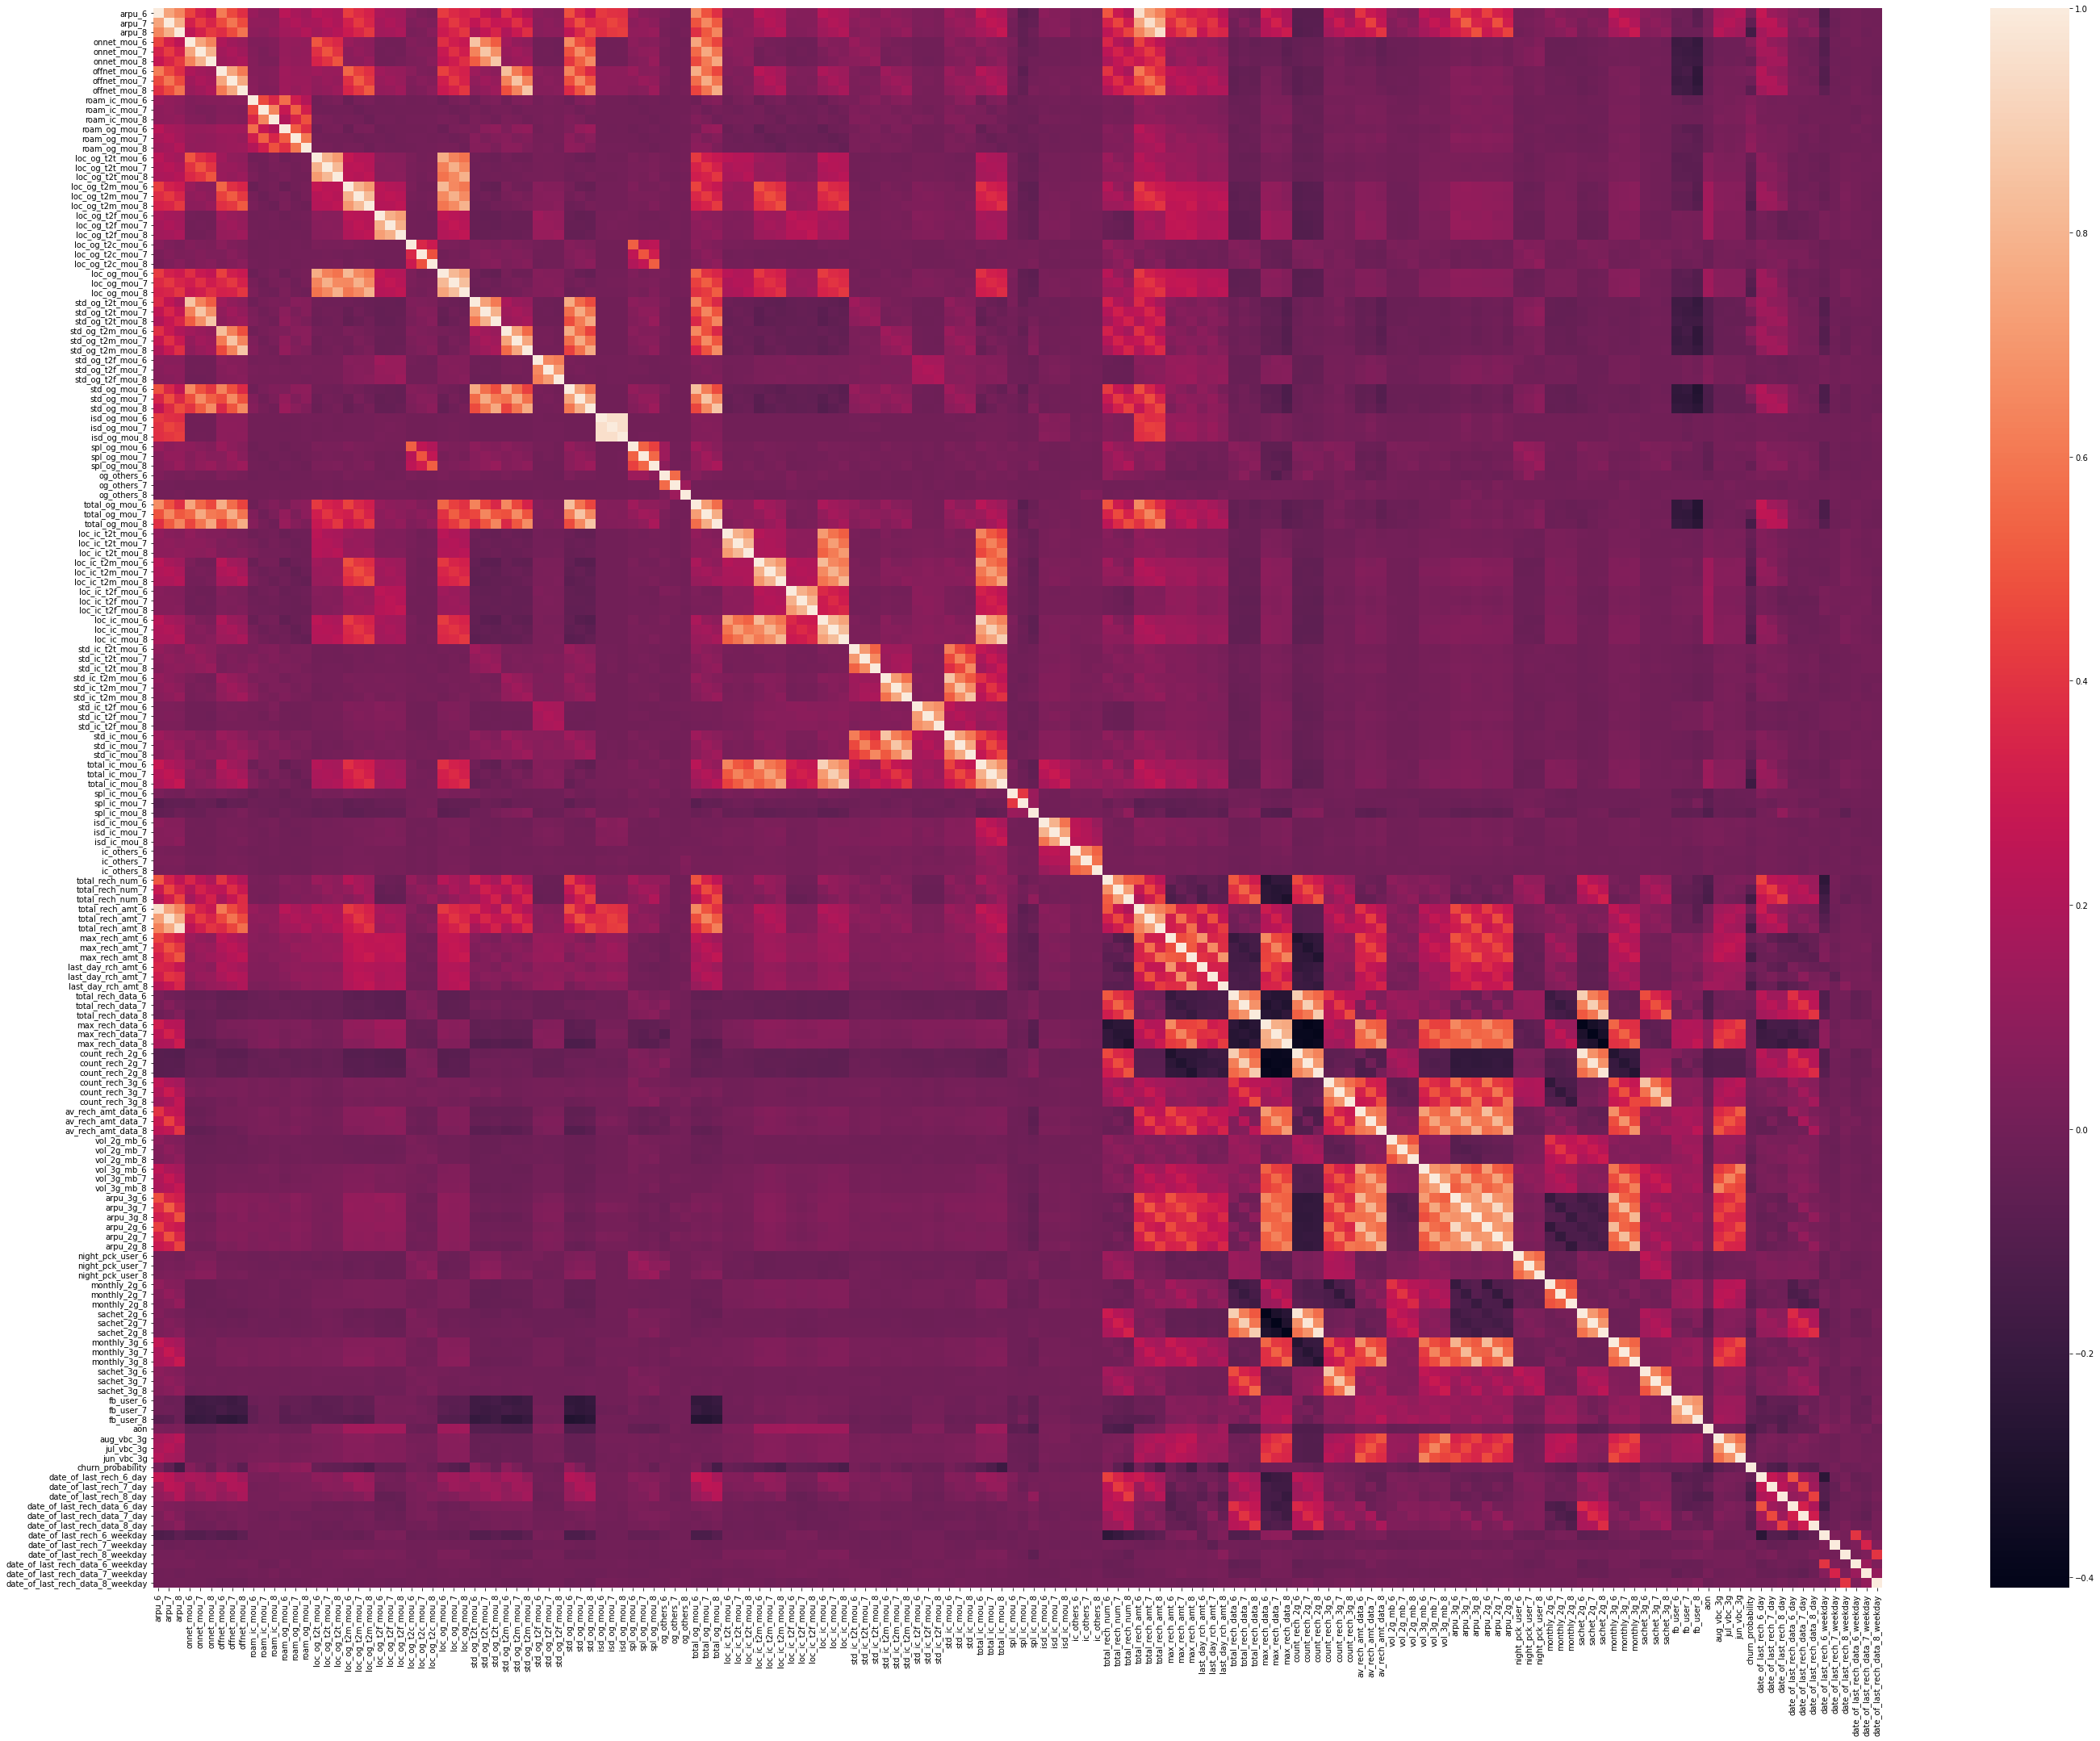

In [30]:
plt.figure(figsize=(48,36))

sns.heatmap(df.corr());

Despite the large amount of columns, we can see the trend that there are pretty high correlation on the bottom right of the plot, this will introduce multicolinearity that we need to handle.

## 2.3. Outlier Analysis

### 2.3.1. Outlier Analysis with Boxplot

#### Boxplot of Raw Values

Lets see how the visual representation of our dataset raw values using boxplot.

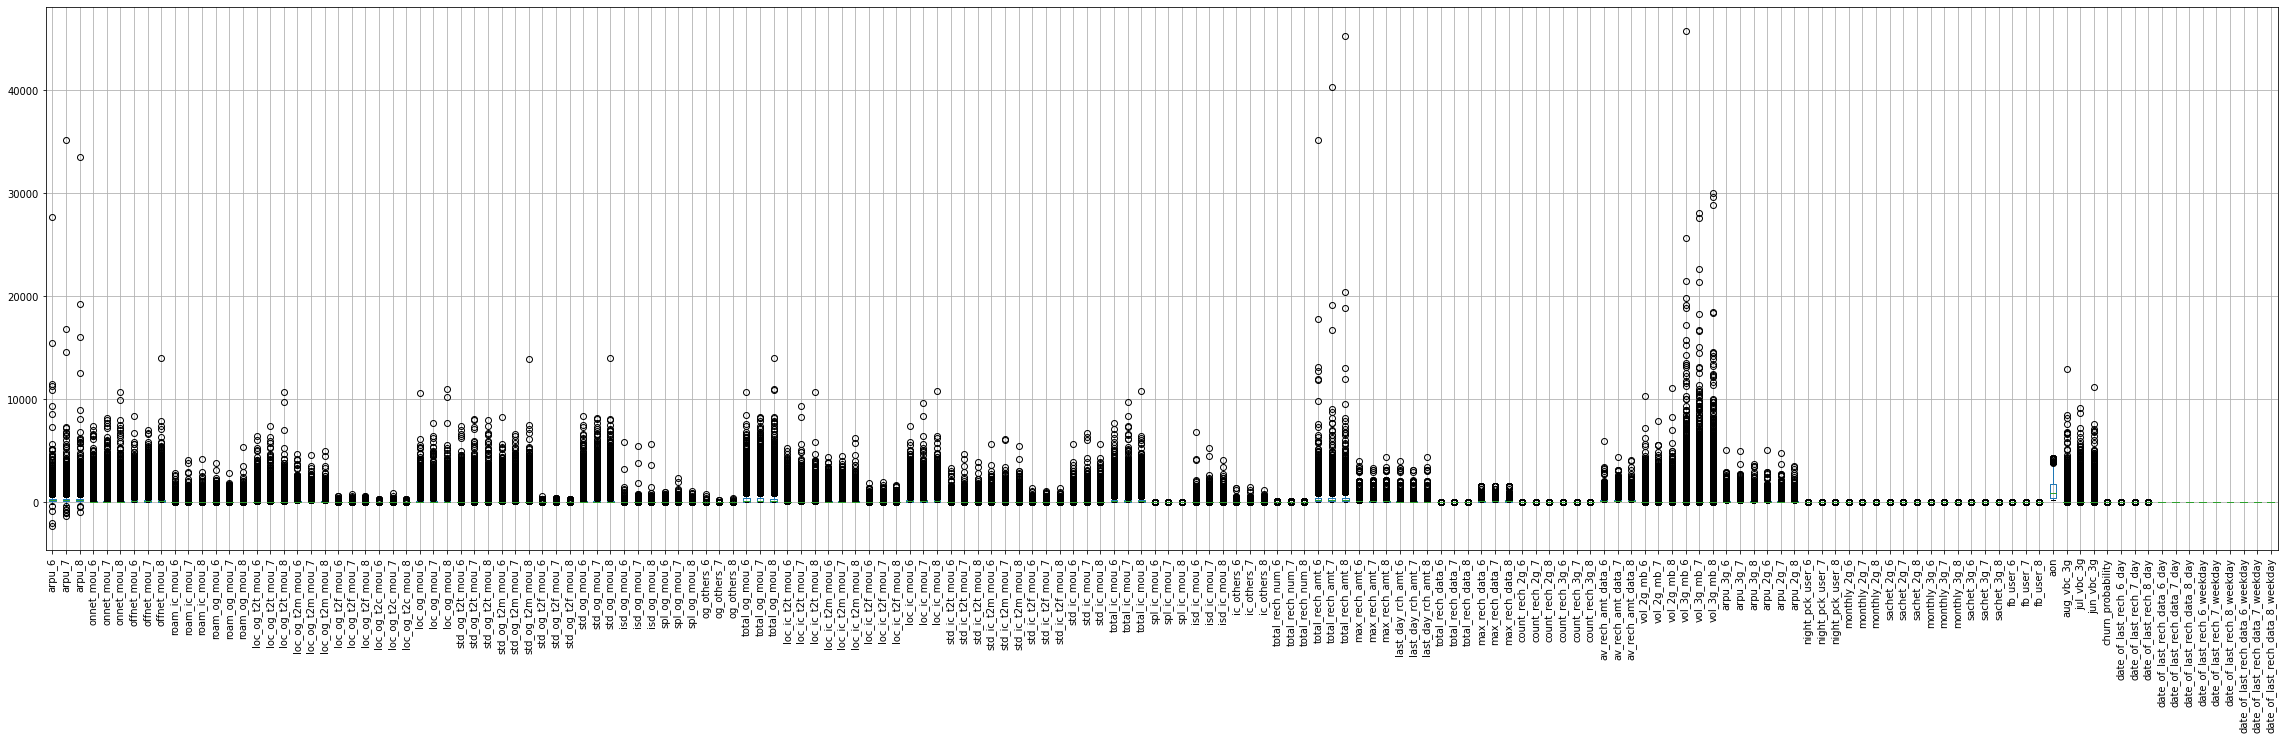

In [31]:
df.boxplot(figsize=(40,10), rot=90);

Clearly there are extreme outliers in three clusters of variable, but displaying all columns are rather irrelevant to our analysis, we can already know what columns have the most extreme outliers, but for clarity, lets take another perspective of our data.

#### Boxplot of Standard Deviation

Outliers affect central and spread measure, here we'll focus the boxplot of our dataset only on high values of standard variation.

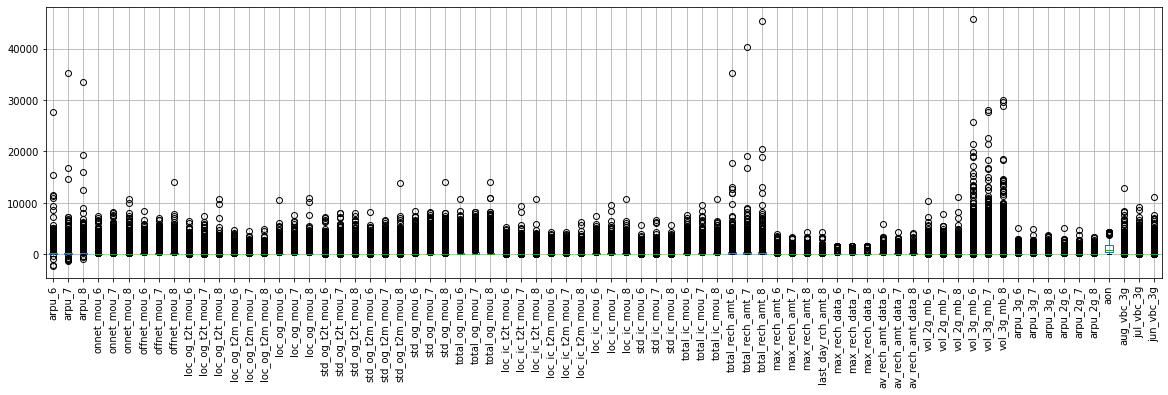

In [32]:
df_std = pd.DataFrame(df.describe().loc['std'], columns=['std'])
df_std_high = df_std[df_std['std'] > 100]

df[df_std_high.index].boxplot(figsize=(20, 5), rot=90);

From here, we can see clearer, with only variables having high standard deviation being plotted. In the above plot, there are three clusters of variables that has extreme outliers, which are: arpu, total recharge amount, and volume 3g in megabytes.

### 2.3.2. Remove Extreme Outliers

#### ZSCORE Values

Now that we know which variables has extreme outliers, we will remove them. Lets create a table of zscore values on the above three clusters of variables to determine how far are the values from the mean in zscore value.

In [33]:
outliers = [
    'arpu_6', 'arpu_7', 'arpu_8',
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
    'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'
]

z = np.abs(stats.zscore(df[outliers]))

We want to remove extreme outliers so that our model can perform better by excluding them from the estimator, and extreme values affect the most.

In [34]:
z[z < 25].isna().sum()

arpu_6               6
arpu_7               3
arpu_8               4
total_rech_amt_6     6
total_rech_amt_7     3
total_rech_amt_8     5
vol_3g_mb_6         10
vol_3g_mb_7          9
vol_3g_mb_8          8
dtype: int64

Now that we know how many outliers per column, lets see how many rows will be affected.

In [35]:
(z[z < 25].isna().sum(axis=1) > 0).sum()

27

#### Remove Outliers

Lets remove these outliers.

In [36]:
df = df[(np.abs(stats.zscore(df[outliers])) < 25).all(axis=1)]

Finally lets see the end result.

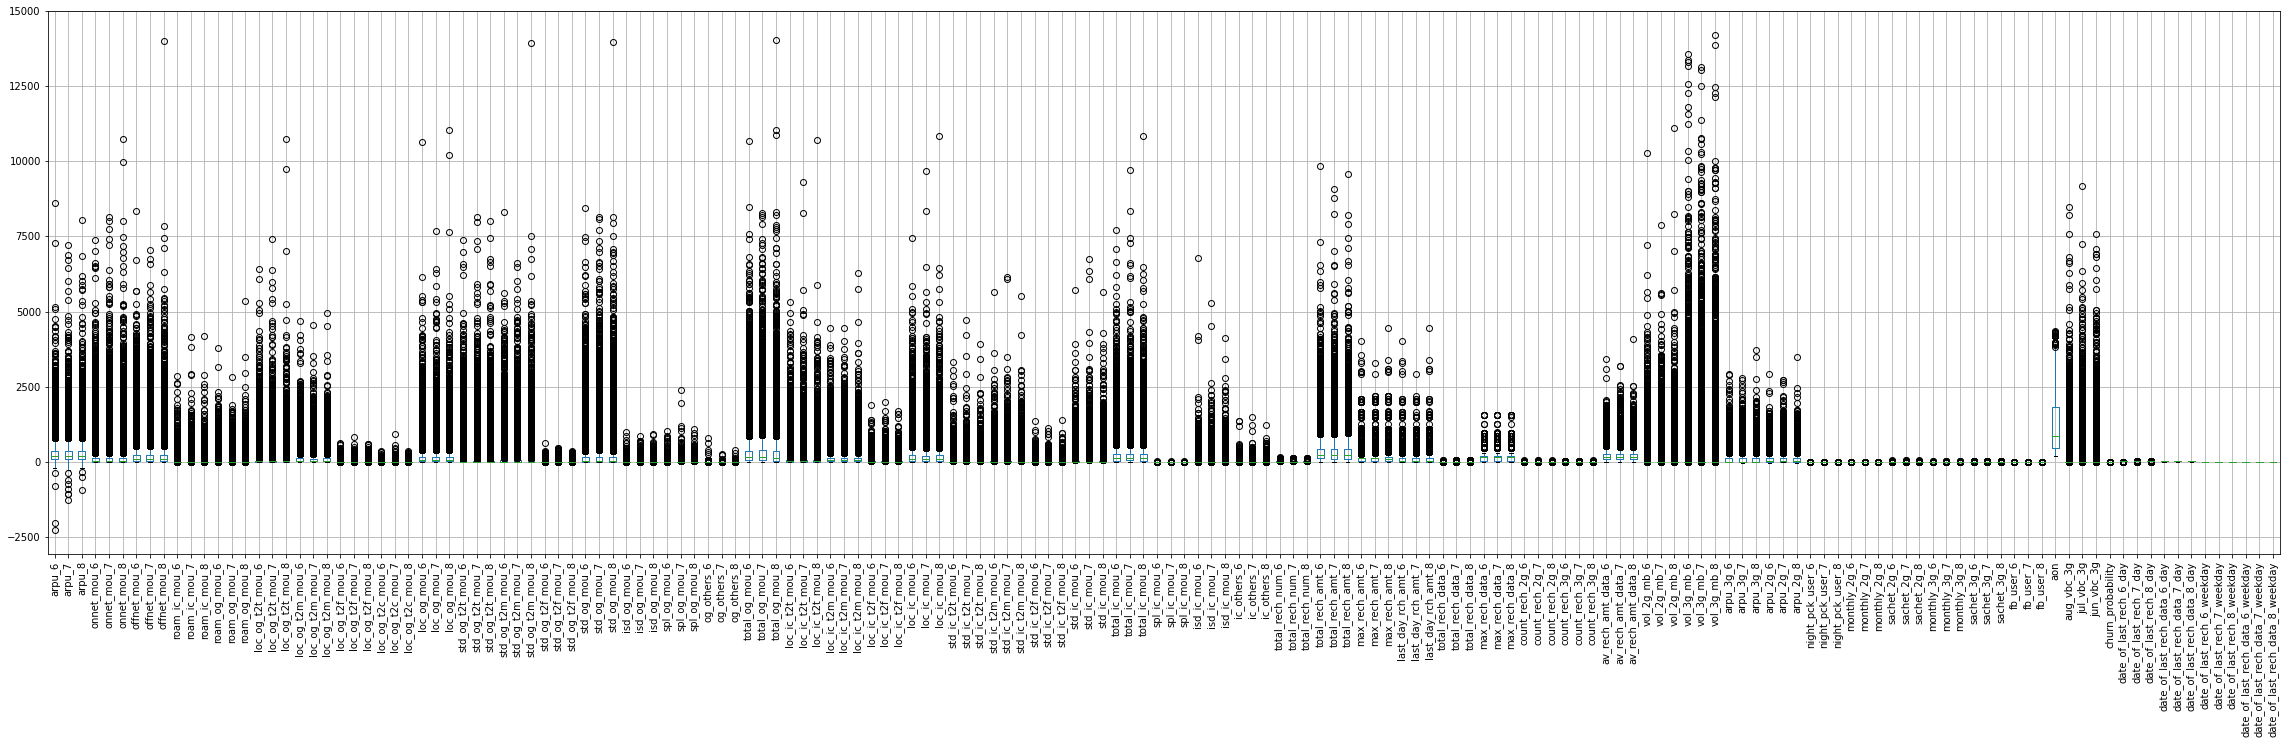

In [37]:
df.boxplot(figsize=(40,10), rot=90);

Now that we have no longer extreme outliers on specific clusters of data, we can continue building our model.

---

# 3. Model Building, Selection, Evaluation & Prediction

## 3.1. Model Preparation

### 3.1.1. Train Test Split

#### Missing Target Values

Lets see if we have any missing value on our target variable.

In [38]:
df['churn_probability'].isna().sum()

0

Now that we know we have no missing values in our target variable, we can move on to the next step, if there were any missing values in our target variable, we would have to remove rows with the missing target values.

#### Churn Probability Distribution

Before we do any splitting, lets first evaluate our churn probability distribution.

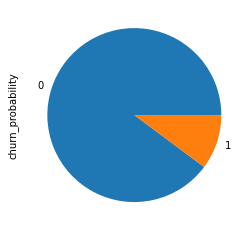

In [39]:
df['churn_probability'].value_counts().plot.pie();

We have an imbalance between each class of churn probability, and therefore this must be taken into consideration during the train test split process, that is we must stratify our split based on the target variable.

#### Train Test Split

We can split our dataset with stratified on the target variable as follows.

In [40]:
X = df.drop('churn_probability', axis=1)
y = df['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df[['churn_probability']])